# IBM Data Science Capstone Project

## || Part 5 : Interactive Map with Folium

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# Using the ready dataset from the previous activities, focusing for the TARGET Variable
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [20]:
# Here is the encoded independent variable dataframe
x_encoded = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
x_encoded.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


1. Creating Numpy Array from Target Variable

In [21]:
Y = df['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

2. Standardizing X with Standard Scaler

In [22]:
scaler = preprocessing.StandardScaler()

x_scaled = scaler.fit_transform(x_encoded)
x_scaled[0]

array([-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, -1.57589457e+00,
       -9.73440458e-01, -1.05999788e-01, -1.05999788e-01, -6.54653671e-01,
       -1.05999788e-01, -5.51677284e-01,  3.44342023e+00, -1.85695338e-01,
       -3.33333333e-01, -1.05999788e-01, -2.42535625e-01, -4.29197538e-01,
        7.97724035e-01, -5.68796459e-01, -4.10890702e-01, -4.10890702e-01,
       -1.50755672e-01, -7.97724035e-01, -1.50755672e-01, -3.92232270e-01,
        9.43398113e+00, -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
       -1.05999788e-01, -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
       -1.05999788e-01, -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
       -1.05999788e-01, -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
       -1.05999788e-01, -1.05999788e-01, -1.05999788e-01, -1.50755672e-01,
       -1.05999788e-01, -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
       -1.05999788e-01, -1.50755672e-01, -1.05999788e-01, -1.50755672e-01,
       -1.50755672e-01, -

3. Split 80% Train and 20% Test Data

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size = 0.2, random_state = 42)

In [24]:
y_test.shape

(18,)

4. LOGISTIC REGRESSION

In [25]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

In [26]:
lr = LogisticRegression(random_state = 42)

parameters = {
    'C' : [0.01, 0.1, 1],
    'penalty' : ['l2'],
    'solver' : ['lbfgs']
}

logreg_cv = GridSearchCV(lr, param_grid = parameters, cv = 10)
logreg_cv.fit(x_train, y_train)

# Find the best parameters with it scores for the TRAIN DATA
print ("Best Parameters : ", logreg_cv.best_params_)
print ("Best Accuracy Score on TRAINING Data: ", logreg_cv.best_score_)

Best Parameters :  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Accuracy Score on TRAINING Data:  0.8035714285714285


Best Accuracy Score on TESTING Data:  1.0


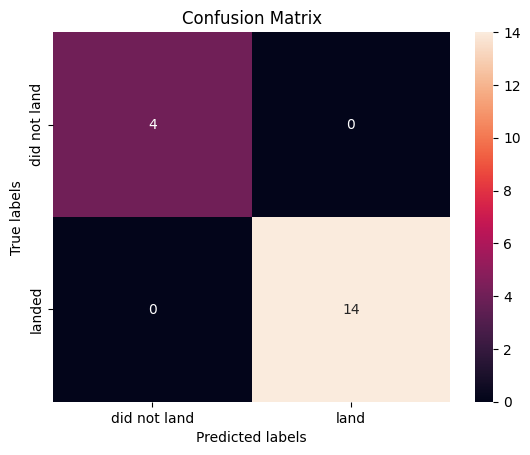

In [27]:
# Evaluate the model using TEST DATA
logreg = LogisticRegression(random_state = 42, **logreg_cv.best_params_)
logreg.fit(x_test, y_test)

bestAccuracyLog = logreg.score(x_test, y_test)
print ("Best Accuracy Score on TESTING Data: ", bestAccuracyLog)
yhat = logreg.predict(x_test)
plot_confusion_matrix(y_test, yhat)
plt.show()

5. SUPPORT VECTOR MACHINE

In [28]:
svm = SVC(random_state = 42)

parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

svm_cv = GridSearchCV(svm, parameters, cv = 10)
svm_cv.fit(x_train, y_train)

# Find the best parameters with it scores for the TRAIN DATA
print ("Best Parameters : ", svm_cv.best_params_)
print ("Best Accuracy Score on TRAINING Data: ", svm_cv.best_score_)

Best Parameters :  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Best Accuracy Score on TRAINING Data:  0.832142857142857


Best Accuracy Score on TESTING Data:  1.0


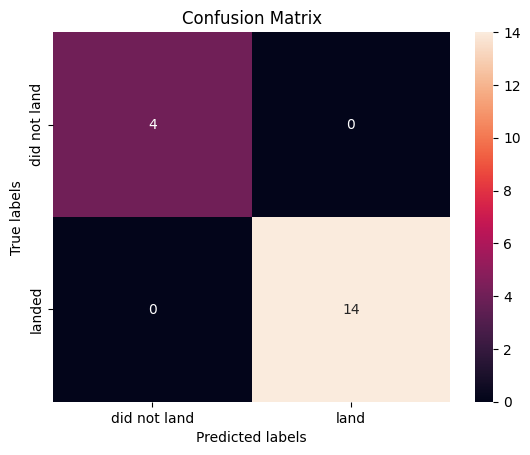

In [29]:
svm = SVC(random_state = 42, **svm_cv.best_params_)
svm.fit(x_test, y_test)

bestAccuracySVM = svm.score(x_test, y_test)
print ("Best Accuracy Score on TESTING Data: ", bestAccuracySVM)
yhat = svm.predict(x_test)
plot_confusion_matrix(y_test, yhat)
plt.show()

6. DECISION TREE

In [30]:
tree = DecisionTreeClassifier(random_state=42)

parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree_cv = GridSearchCV(tree, parameters, cv = 10)

tree_cv.fit(x_train, y_train)

# Find the best parameters with it scores for the TRAIN DATA
print ("Best Parameters : ", tree_cv.best_params_)
print ("Best Accuracy Score on TRAINING Data: ", tree_cv.best_score_)

Best Parameters :  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best Accuracy Score on TRAINING Data:  0.875


C:\Users\Alexander\anaconda3\envs\scala\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alexander\anaconda3\envs\scala\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alexander\anaconda3\envs\scala\lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\Alexander\anaconda3\envs\scala\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_paramete

Best Accuracy Score on TESTING Data:  1.0


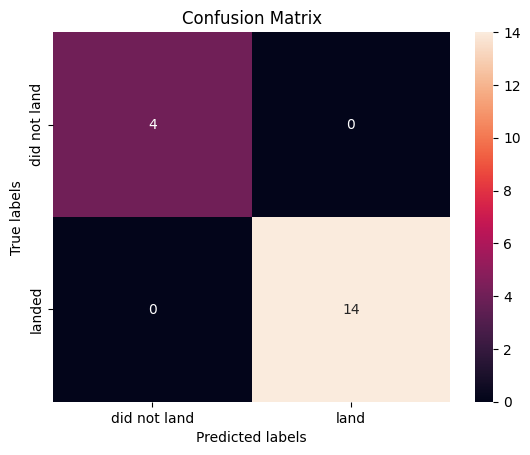

In [31]:
tree = DecisionTreeClassifier(random_state=42, **tree_cv.best_params_)

tree.fit(x_test, y_test)

bestAccuracyTree = tree.score(x_test, y_test)
print ("Best Accuracy Score on TESTING Data: ", bestAccuracyTree)
yhat = tree.predict(x_test)
plot_confusion_matrix(y_test, yhat)

7. K NEAREST NEIGHBOURS

In [32]:
KNN = KNeighborsClassifier()

parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

knn_cv = GridSearchCV(KNN, param_grid=parameters, cv = 10)

knn_cv.fit(x_train, y_train)

print ("Best Parameters : ", knn_cv.best_params_)
print ("Best Accuracy Score on TRAINING Data: ", knn_cv.best_score_)

Best Parameters :  {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}
Best Accuracy Score on TRAINING Data:  0.8446428571428569


Best Accuracy Score on TESTING Data:  0.7777777777777778


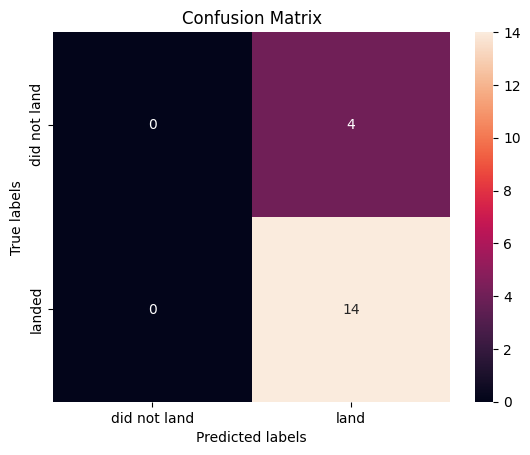

In [33]:
KNN = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 10, p = 1)

KNN.fit(x_test, y_test)

bestAccuracyKNN = KNN.score(x_test, y_test)
print ("Best Accuracy Score on TESTING Data: ", bestAccuracyKNN)
yhat = KNN.predict(x_test)
plot_confusion_matrix(y_test, yhat)

-- VISUALIZATION FOR EACH MODEL'S ACCURACY

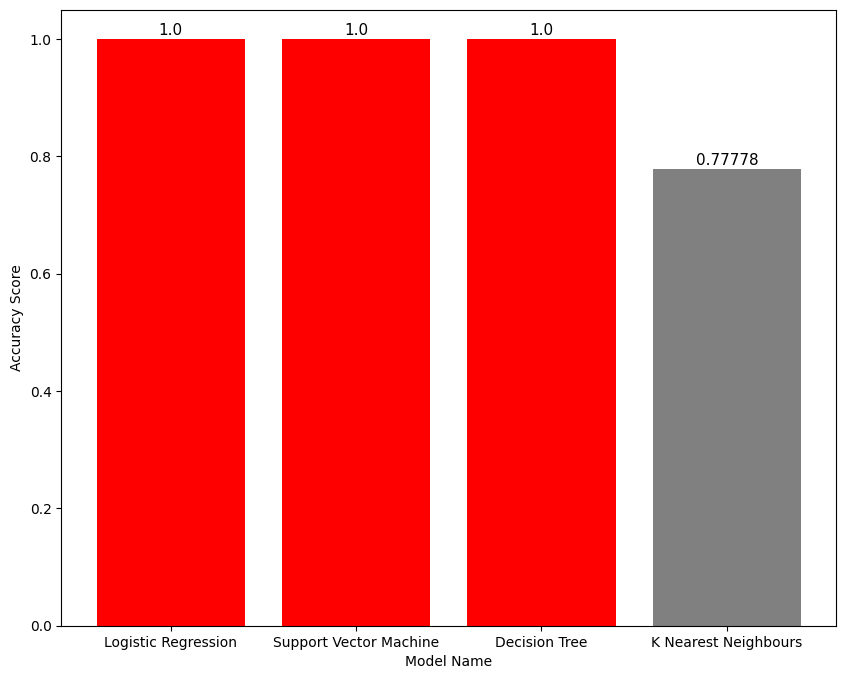

In [34]:
model = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'K Nearest Neighbours']
accuracy = [bestAccuracyLog, bestAccuracySVM, bestAccuracyTree, bestAccuracyKNN]

dfviz = pd.DataFrame({'Model':model, 'Accuracy':accuracy})
dfviz = dfviz.sort_values(by='Accuracy', ascending=False)

colors = ['red' if val == dfviz['Accuracy'].max() else 'gray' for val in dfviz['Accuracy']]

plt.figure(figsize = (10,8))
plt.bar(dfviz['Model'], dfviz['Accuracy'], color = colors)
for i, val in enumerate(dfviz['Accuracy']):
  plt.text(i, val + 0.008, str(round(val,5)), ha = 'center', size = 11)
plt.xlabel("Model Name")
plt.ylabel("Accuracy Score")
plt.show()